# 结课项目

在此项目中，你将扮演侦探，运用你的机器学习技能构建一个算法，通过公开的安然财务和邮件数据集，找出有欺诈嫌疑的安然雇员。

## 我要如何完成此项目？

在开始之前，你应该注意，此迷你项目需要大量数据点才能给出直观的结果，并且良好地运行起来。 **此项目更为棘手的原因在于，我们使用了真实的数据，这些数据可以是杂乱无章的，而且在进行机器学习时不具有我们所希望的大量数据点。** 

不要失去信心——作为数据分析师，你只需要习惯不完美的数据！如果你遇到之前没有见过的事物，请退后一步想想聪明的解决之道。要相信自己！

## 项目概述

安然曾是 2000 年美国最大的公司之一。2002 年，由于其存在大量的企业欺诈行为，这个昔日的大集团土崩瓦解。 在随后联邦进行的调查过程中，大量有代表性的保密信息进入了公众的视线，包括成千上万涉及高管的邮件和详细的财务数据。 

你将在此项目中扮演侦探，运用你的新技能，**根据安然丑闻中公开的财务和邮件数据来构建相关人士识别符。** 为了协助你进行侦查工作，我们已将数据与手动整理出来的欺诈案涉案人员列表进行了合并， 这意味着被起诉的人员要么达成和解，要么向政府签署认罪协议，再或者出庭作证以获得免受起诉的豁免权。

### 相关文件如下所示：

*poi_id.py*：用于 POI 识别符的初始代码，你将在此处撰写你的分析报告。你也将提交此文件的副本，用于评估人员检验你的算法和结果。

*final_project_dataset.pkl*：项目数据集，详情如下。

*tester.py*：在你提交供优达学城评估的分析报告时，你将随附算法、数据集和你使用的特征列表（这些是在 poi_id.py 中自动创建的）。 评估人员将在此后使用这一代码来测试你的结果，以确保性能与你在报告中所述类似。你无需处理这一代码，我们只是将它呈现出来供你参考。

*emails_by_address*：该目录包含许多文本文件，每个文件又包含特定邮箱的往来邮件。 你可以进行参考，并且可以根据邮件数据集的详细信息创建更多的高级特征。你无需处理电子邮件语料库来完成项目。

## 迈向成功

我们将给予你可读入数据的初始代码，将你选择的特征放入 numpy 数组中，该数组是大多数 sklearn 函数假定的输入表单。 **你要做的就是设计特征，选择并调整算法，用以测试和评估识别符。** 我们在设计数个迷你项目之初就想到了这个最终的项目，因此请记得借助你已完成的工作成果。

在预处理此项目时，我们已将安然邮件和财务数据与字典结合在一起，字典中的每对键值对应一个人。 字典键是人名，值是另一个字典（包含此人的所有特征名和对应的值）。 数据中的特征分为三大类，即财务特征、邮件特征和 POI 标签。

**财务特征**: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (单位均是美元）

**邮件特征**: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (单位通常是电子邮件的数量，明显的例外是 ‘email_address’，这是一个字符串）

**POI 标签**: [‘poi’] (boolean，整数)

我们鼓励你在启动器功能中制作，转换或重新调整新函数功能。如果这样做，你应该把新功能存储到my_dataset，如果你想在最终算法中使用新功能，你还应该将功能名称添加到 my_feature_list，以便于你的评估者可以在测试期间访问它。关于如何在数据集中添加具体的新要素的例子，可以参考“特征选择”这一课。

此外，我们还建议你可以在完成项目过程中做一些记号。你可以写出系列问题的答案（在下一页），将这个作为提交的项目的一部分，以便于评估者了解到你对于不同方面分析的方法。你的思维过程在很大程度上比你的最终项目更重要，我们将通过你在这些问题的解答中了解你的思维过程。

# 开始

首先把所有需要导入的模块都放在第一个 cell，只需要导入一次。

In [1]:
#!/usr/bin/python

# poi_id.py
import sys
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from tester import dump_classifier_and_data
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
import pickle
from poi_email_addresses import poiEmails
import matplotlib.pyplot as plt
%matplotlib inline


## Task1：确定需要使用的特征

这个部分我初步认为欺诈案嫌疑人的特征首先会体现在收入水平上，所以先使用薪资、奖金和总股票持有量这三个财务特征。稍后再看邮件特征。

In [2]:
# Task 1: Select what features you'll use.
# features_list is a list of strings, each of which is a feature name.
# The first feature must be "poi".

features_list = ['poi', 'salary', 'bonus', 'total_payments'] # You will need to use more features

# Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

## Task2：移除数据中的异常值

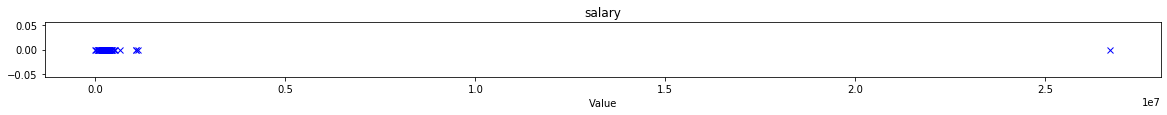

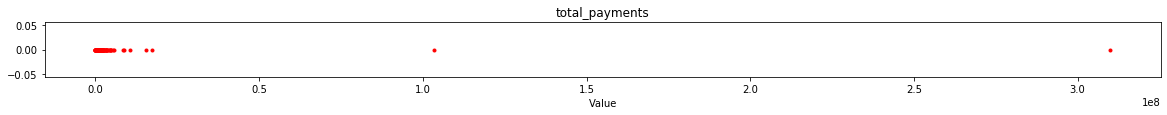

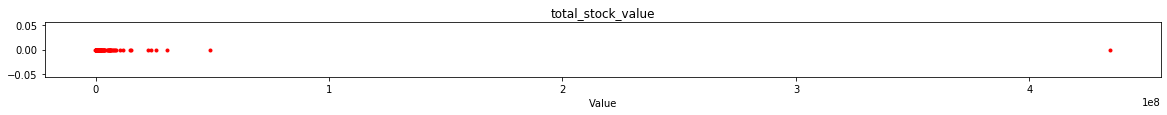

In [6]:
# Task 2: Remove outliers


#这里定义了一个可以画出某个数据一维的分布情况的函数，方便观察一下异常值
def draw_1d(*,dataset, feature_name, style = "r.", figsize = 20):
    plt.figure(figsize=(figsize,1))
    for name in dataset.keys():
        f1 = dataset[name][feature_name]
        if f1 != "NaN":
            plt.plot(f1,0,style)
    plt.title(feature_name)
    plt.xlabel("Value")
    plt.show()

draw_1d(dataset = data_dict,feature_name="salary",style="bx")
draw_1d(dataset = data_dict,feature_name='total_payments')
draw_1d(dataset = data_dict,feature_name='total_stock_value')

首先遍历了整个字典中的人名，然后画出各种数据的一维图像，发现有一个点远超所有的数据，我要把他找出来看看是谁的工资和其他人差这么多个数量级。

In [15]:
def find_max(ori_dataset, *, features, out_type="r", ratio=0.1, num=1):

    from copy import deepcopy
    # 这里使用深层拷贝来防止原来的字典数据被这里的 NaN 值修改语句修改
    dataset = deepcopy(ori_dataset)

    for key in dataset.keys():
        if dataset[key][features] == "NaN":
            dataset[key][features] = 0.0

    sort = sorted(dataset, reverse=True,
                  key=lambda name: dataset[name][features])

    if out_type == "r":
        data_point_num = int(len(sort)*ratio)
        #print("Should return %d data point(s)" % data_point_num)
    elif out_type == "n":
        data_point_num = num

    return sort[:data_point_num]


print("The biggest data:", find_max(
    data_dict, features="salary", out_type="n", num=1)[0])

print("The people who has taken the highest amount:",find_max(data_dict, features="salary", out_type="r", ratio=0.1))

The biggest data: SKILLING JEFFREY K
The people who has taken the highest amount: ['SKILLING JEFFREY K', 'LAY KENNETH L', 'FREVERT MARK A', 'PICKERING MARK R', 'WHALLEY LAWRENCE G', 'DERRICK JR. JAMES V', 'FASTOW ANDREW S', 'SHERRIFF JOHN R', 'RICE KENNETH D', 'CAUSEY RICHARD A', 'KEAN STEVEN J', 'HAEDICKE MARK E', 'MCMAHON JEFFREY', 'METTS MARK']


发现最大的那个异常值是名字为 TOTAL 的字典键，也就是说其实是数据库中求和过后的结果，我不太需要这个值，所以直接删掉，并且把删除这个值之后的数据保存为 dataset_processed.pkl

In [12]:
# 数据只需要删除一次并且保存一下
# data_dict.pop("TOTAL")

# with open('dataset_processed.pkl', 'wb') as dataset:
#    pickle.dump(data_dict, dataset, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
#读入之前保存的删除了 TOTAL 的数据集
with open("dataset_processed.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

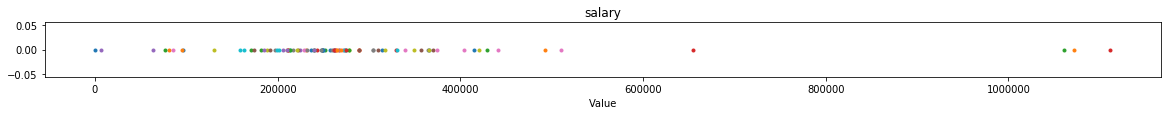

In [10]:
draw_1d(dataset = data_dict,feature_name="salary",style=".")

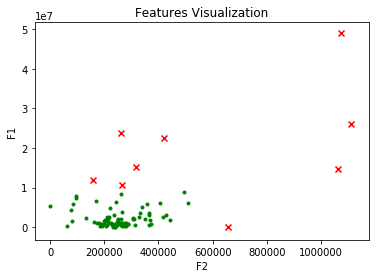

In [11]:
x_data = []
for name in data_dict.keys():
    f1 = data_dict[name]['salary']
    f2 = data_dict[name]['total_stock_value']
    if f1 != "NaN" and f2 != "NaN":
        if f1 > 6e5 or f2 > 1e7:
            x_data.append([name,f1, f2])
            plt.scatter(f1,f2,marker="x",c="r")
        else:
            plt.scatter(f1,f2,marker=".",c="g")
plt.title("Features Visualization")
plt.ylabel("F1")
plt.xlabel("F2")
plt.show()
# print("People who has taken the Highest amount:")
# for x in x_data:
#    print("\nName: %s\nSalary: %d\nStock: %d" % (x[0],x[1],x[2]))

In [12]:
# Task 3: Create new feature(s)

# 这里想使用PCA对于财务方面的数据做一个分析，然后看看效果如何。
# 所以可能要输入全部的特征给PCA才比较有效果
from sklearn.decomposition import PCA
# 


all_financial_features = ['poi', 'deferral_payments', 'total_payments', 'loan_advances',
                          'bonus', 'restricted_stock_deferred', 'deferred_income',
                          'total_stock_value', 'expenses', 'exercised_stock_options', 
                          'other', 'long_term_incentive', 'restricted_stock', 'director_fees']




finance_data = featureFormat(
    data_dict, all_financial_features, remove_NaN=True)
poi_labels, finance_features = targetFeatureSplit(finance_data)

features_train, features_test ,labels_train, labels_test = train_test_split(finance_features, poi_labels, test_size = 0.3, random_state = 42)
features_train = np.array(features_train)
features_test = np.array(features_test)
finance_features = np.array(finance_features)

all_features_pca = np.array(finance_features)

finance_pca = PCA(n_components=3, whiten=True)
all_finance_pca = PCA(n_components=2, whiten=True)
#all_pca.fit_
all_features_pca = all_pca.fit_transform(finance_features)
finance_features_train = pca.fit_transform(features_train)
finance_features_test = pca.transform(features_test)


print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
# Store to my_dataset for easy export below.
#my_dataset = data_dict


# Extract features and labels from dataset for local testing
#data = featureFormat(my_dataset, features_list, sort_keys=True)
#labels, features = targetFeatureSplit(data)

### 看看邮件数据里有什么有价值的东西



In [32]:
from sklearn.decomposition import PCA

all_email_features =  ['poi','to_messages', 'from_poi_to_this_person', 'from_messages', 
                       'from_this_person_to_poi', 'shared_receipt_with_poi'] 

email_data = featureFormat(
    data_dict, all_email_features, remove_NaN=True)
poi_labels_email, email_features = targetFeatureSplit(email_data)

email_features_train, email_features_test ,email_labels_train, email_labels_test \
    = train_test_split(email_features, poi_labels_email, test_size = 0.3, random_state = 42)
email_features_train = np.array(email_features_train)
email_features_test = np.array(email_features_test)


email_pca = PCA(n_components=2,whiten=True)
train_email_features_pca = email_pca.fit_transform(email_features_train)
print(email_pca.explained_variance_)
print(email_pca.explained_variance_ratio_)
test_email_features_pca = email_pca.transform(email_features_test)

[11270511.41941995  3322099.12922766]
[0.7550185  0.22254946]


In [33]:
from sklearn.svm import SVC

email_svm = SVC(kernel="rbf",gamma="auto")
email_svm.fit(email_features_train, email_labels_train)
print("Before PCA:",email_svm.score(email_features_test, email_labels_test))

email_svm_pca = SVC(kernel="rbf",gamma="auto")
email_svm_pca.fit(train_email_features_pca, email_labels_train)
print("After PCA",email_svm_pca.score(test_email_features_pca, email_labels_test))

Before PCA: 0.9230769230769231
After PCA 0.9230769230769231


In [19]:
# Task 4: Try a varity of classifiers
# Please name your classifier clf for easy export below.
# Note that if you want to do PCA or other multi-stage operations,
# you'll need to use Pipelines. For more info:
# http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
# 使用朴素贝叶斯对原始数据（未进行PCA处理）进行拟合
clf = GaussianNB()
clf.fit(features_train, labels_train)
print("Before PCA:",clf.score(features_test, labels_test))

# 使用朴素贝叶斯对经过主成分分析的数据进行拟合
clf_pca = GaussianNB()
clf_pca.fit(finance_features_train, labels_train)
print("After PCA:",clf_pca.score(finance_features_test, labels_test))

Before PCA: 0.22727272727272727
After PCA: 0.8636363636363636


**PCA无敌！！！！**我的妈耶，经过PCA以后的数据用最简单的分类器，准确率提升也太夸张了。因为一开始就采用了PCA，所以看到Task5说要把分类器的表现从0.3提升起来，感觉比较奇怪，因为我的分类器已经0.93的准确率了。
所以才做了这个对比。可以看到，即使只选择第一主成分，对于准确率的提升也是很大了。

In [15]:
# 测试支持向量机算法
from sklearn.svm import SVC

svm = SVC(kernel="rbf",gamma="auto")
svm.fit(finance_features_train, labels_train)
svm.score(finance_features_test, labels_test)

0.8863636363636364

In [16]:
# 测试 Adaboost 算法
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=80)
ada.fit(finance_features_train, labels_train)
ada.score(finance_features_test, labels_test)

0.8181818181818182

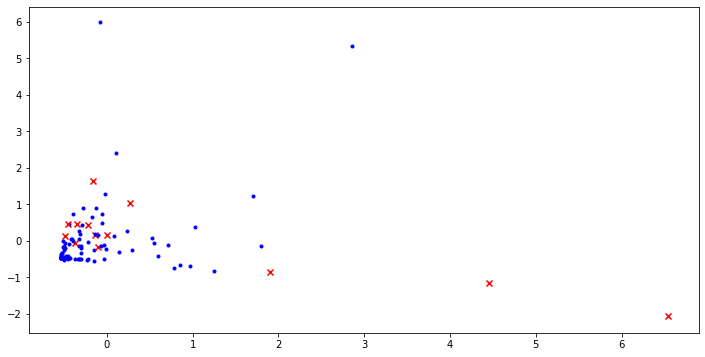

In [17]:
plt.figure(figsize=(12,6))
for f in range(len(finance_features_train)):
    if labels_train[f]:
        plt.scatter(finance_features_train[f][0],finance_features_train[f][1],c = "r", marker="x")
    else:
        plt.scatter(finance_features_train[f][0],finance_features_train[f][1],c = "b", marker=".")
plt.show()

In [ ]:
# Task 5: Tune your classifier to achieve better than .3 precision and recall
# using our testing script. Check the tester.py script in the final project
# folder for details on the evaluation method, especially the test_classifier
# function. Because of the small size of the dataset, the script uses
# stratified shuffle split cross validation. For more info:
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [34]:
# Task 6: Dump your classifier, dataset, and features_list so anyone can
# check your results. You do not need to change anything below, but make sure
# that the version of poi_id.py that you submit can be run on its own and
# generates the necessary .pkl files for validating your results.

dump_classifier_and_data(email_svm_pca, data_dict, all_email_features)

In [35]:
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
import pickle
import sys
from sklearn.model_selection import StratifiedShuffleSplit


PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"


def test_classifier(clf, dataset, feature_list, folds=1000):
    data = featureFormat(dataset, feature_list, sort_keys=True)
    labels, features = targetFeatureSplit(data)
    #cv = StratifiedShuffleSplit(labels, folds, random_state=42)
    cv = StratifiedShuffleSplit(n_splits=folds, random_state=42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv.split(features, labels):
        features_train = []
        features_test = []
        labels_train = []
        labels_test = []
        for ii in train_idx:
            features_train.append(features[ii])
            labels_train.append(labels[ii])
        for jj in test_idx:
            features_test.append(features[jj])
            labels_test.append(labels[jj])

        # fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print("Warning: Found a predicted label not == 0 or 1.")
                print("All predictions should take value 0 or 1.")
                print("Evaluating performance for processed predictions:")
                break
    try:
        total_predictions = true_negatives + \
            false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives / \
            (2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print(clf)
        print(PERF_FORMAT_STRING.format(accuracy, precision,
                                        recall, f1, f2, display_precision=5))
        print(RESULTS_FORMAT_STRING.format(total_predictions,
                                           true_positives, false_positives, false_negatives, true_negatives))
        print("")
    except:
        print("Got a divide by zero when trying out:", clf)
        print("Precision or recall may be undefined due to a lack of true positive predicitons.")


CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"


def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "wb") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "wb") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "wb") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)


def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "rb") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "rb") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "rb") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list


def main():
    # load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    # Run testing script
    test_classifier(clf, dataset, feature_list)


main()

Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.
